
- Implemented a 2-class classification neural network with a single hidden layer
- Used units with a non-linear activation function, such as ReLu 
- Computed the cross entropy loss 
- Implementd forward and backward propagation


In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from additional_funcs.testcases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from additional_funcs.planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## Dataset ##

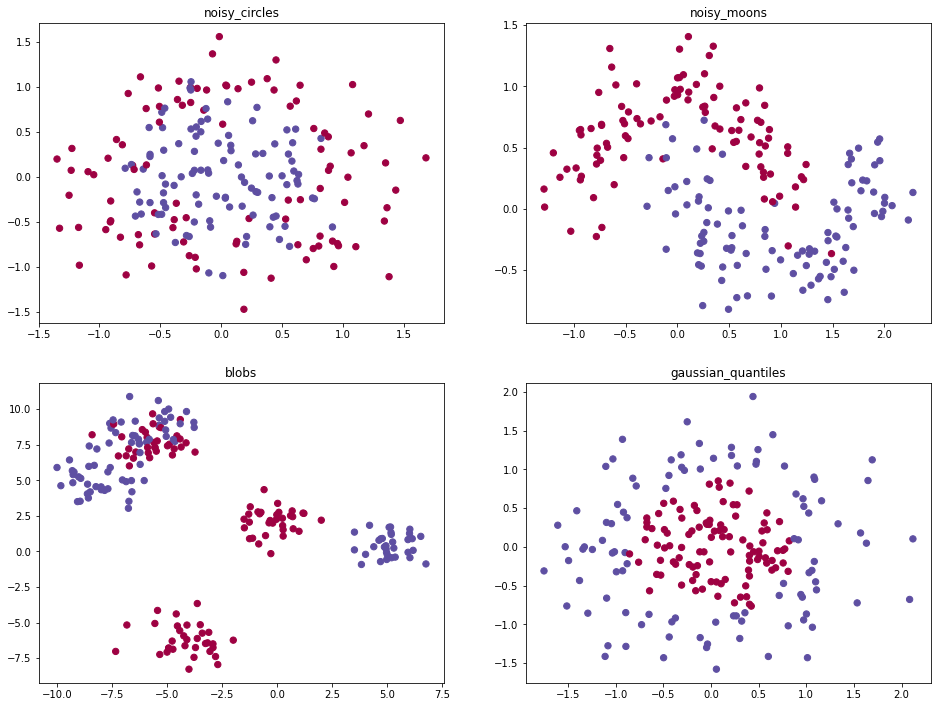

In [2]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}


plt.figure(figsize=(16, 32))
for i, dataset in enumerate(datasets):
    plt.subplot(5, 2, i+1)
    plt.title(dataset)
    #print(dataset)
    X, Y = datasets[dataset]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # make blobs binary
    if dataset == "blobs":
        Y = Y%2

    # Visualize the data
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)


# Lets plot dat in 3D space

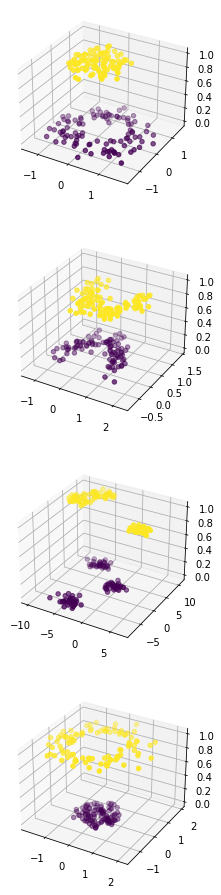

In [3]:
fig = plt.figure(figsize=(18, 16))
for i, dataset in enumerate(datasets):

    X, Y = datasets[dataset]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # make blobs binary
    if dataset == "blobs":
        Y = Y%2
    
    # Visualize the data
    ax = fig.add_subplot(len(datasets), 1, i+1, projection='3d')

    ax.scatter(X[0], X[1], Y, c=Y)

## On this plot we can see that data is separable, that we cannot see from 2D plot

In [4]:
def accuracy(y, y_pred):
    return float((np.dot(y,y_pred.T) + np.dot(1-y,1-y_pred.T))/float(y.size)*100)

In [5]:
from additional_funcs.model7 import *

# Learning of our 3 models

In [6]:
# fig = plt.figure(figsize=(18, 32))
i= 0
result = {}
predictions_params = {}
act_funcs =['sigmoid', 'tanh', 'relu']
for dataset in datasets:
    result[dataset] = {}
    predictions_params[dataset] = {}
    for hidden in act_funcs:


        X, Y = datasets[dataset]
        X, Y = X.T, Y.reshape(1, Y.shape[0])

        # make blobs binary
        if dataset == "blobs":
            Y = Y%2

        # fit and predict


        parameters = nn_model(X, Y, 10, num_iterations = 10000, act_func = hidden)
        predictions = predict(parameters, X, act_func = hidden)
        predictions_params[dataset][hidden] = predictions
        accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
        result[dataset][hidden] = accuracy
        i += 1
        print ("{} Accuracy for {} 10 hidden neurons: {} %".format(dataset, hidden, accuracy))

noisy_circles Accuracy for sigmoid 10 hidden neurons: 83.0 %
noisy_circles Accuracy for tanh 10 hidden neurons: 83.5 %
noisy_circles Accuracy for relu 10 hidden neurons: 56.49999999999999 %
noisy_moons Accuracy for sigmoid 10 hidden neurons: 86.0 %
noisy_moons Accuracy for tanh 10 hidden neurons: 96.5 %
noisy_moons Accuracy for relu 10 hidden neurons: 96.0 %
blobs Accuracy for sigmoid 10 hidden neurons: 87.5 %
blobs Accuracy for tanh 10 hidden neurons: 85.5 %
blobs Accuracy for relu 10 hidden neurons: 68.0 %
gaussian_quantiles Accuracy for sigmoid 10 hidden neurons: 99.5 %
gaussian_quantiles Accuracy for tanh 10 hidden neurons: 100.0 %


C:\Users\user\Jupyter\gl-ml-basecamp\HW-4\additional_funcs\model7.py:154: RuntimeWarning: divide by zero encountered in log
  cost = -(np.dot(Y, np.log(A2).T) + np.dot((1 - Y), np.log(1 - A2).T)) / m


gaussian_quantiles Accuracy for relu 10 hidden neurons: 99.5 %


In [7]:
result

{'noisy_circles': {'sigmoid': 83.0, 'tanh': 83.5, 'relu': 56.49999999999999},
 'noisy_moons': {'sigmoid': 86.0, 'tanh': 96.5, 'relu': 96.0},
 'blobs': {'sigmoid': 87.5, 'tanh': 85.5, 'relu': 68.0},
 'gaussian_quantiles': {'sigmoid': 99.5, 'tanh': 100.0, 'relu': 99.5}}

In [8]:
import pandas as pd
results = pd.DataFrame(result)
results.T.style.highlight_max(axis=1)

,sigmoid,tanh,relu
noisy_circles,83.000000,83.500000,56.500000
noisy_moons,86.000000,96.500000,96.000000
blobs,87.500000,85.500000,68.000000
gaussian_quantiles,99.500000,100.000000,99.500000


# In this cases tanh activation fuction was better 3 times of 4
# Is says even if ReLU is so popular we need always try different activation funcs and hyperparams to fit our data